<a href="https://colab.research.google.com/github/YangJeongA/class2022Spring/blob/main/220411_sound_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digital Signal Processing
> sampling rate(Hz), frequency(Hz), phasor
-> 이 3가지가 뭔지 알기!

**DSP (Digital Signal Processing)**


* Signal: 시간의 함수

  - x축이 시간 -> 파형. 
  - y축은 강도 
  - 예시: 환율의 변화, Sound, 빛

* Digital
  - Digital(signal이 연속적이지 않고 quantize 되어있음) <-> Analog(연속적인 것)
    - Digitize: analog값은 컴퓨터에서 처리할 수 없으므로 samplig(quantize) 해줘야 함. 즉, digital로 바꿔주는 것.


- 즉, 우리는 DSP에서 Signal을 Digital의 관점에서 공부하고, 그것으로 여러 processing을 할 것.

**Hz**
- 초당 몇개인지를 얘기할때는 Hz를 단위로 사용함

**Sampling rate(Hz)**
- Samplig rate: 초당 몇개의 값이 있는가

- 신호를 등간격으로 쪼개줌 (quantize)
  - 얼만큼 등간격으로? -> **Samplig rate** -> "1초당" 얼만큼 digitize할 것인지 -> 무조건 정해야 함.
    - 1초에 100등분하면 **100Hz**, 1000등분하면 1000Hz
    
     -> 100Hz의 signal은 1초에 100개의 숫자를 가져야 함  

- 1초당 몇 개의 signal로 이 signal이 표현되는지에 대한 것이 sampling rate
  - e.g., 10000Hz인데 1.5초의 signal이라면 15000개의 숫자로 이루어져있는 것

**Frequency(Hz)**

- 주파수: 초당 몇 번 반복하는가
  - 주파수가 높으면 높은소리, 낮으면 낮은소리
  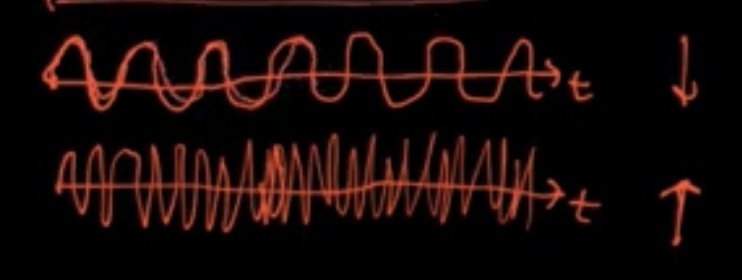
    - signal이 있을 때, 1초에 왔다갔다하는것을 몇번 하는지에 대한 것
      
      -> 위의 첫번째 그림의 경우 초당 7번 왔다갔다하므로 7Hz
    - 말할 때 목이 떨리는데, 이때 몇 번 떨리는지 보는것! 남자는 보통 초당 100번 떨려서 100Hz, 여자는 보통 초당 200Hz.
    - 주파수가 높을 수록 높은 소리

**Phasor (Sine)**
- sine곡선을 만드는 것
- digital signal을 볼 때, smaplig rate, frequency, amplitude, duration(sec)(지속시간) 이런 것들이 sine곡선을 정의하는 특징.
  
  -> 이 4개의 주어진 특징이 있을 때 우리가 sine 곡선을 만들어내는 것을 함수의 형태로 만든 것을 Phasor라고 함 
- Phasor: 특정 parameter의 sine곡선을 만들어 내는 것 
  - 중요한 이유: Hourier가 발견하기로, 시간이 축이 되는 (time function) 모든 signal은 다양한 (=다양한 frequency+amplitude) sine 곡선의 결합(합)으로 이루어져 있음.

    -> 즉, 어떤 복잡한 signal도 sine 곡선으로 쪼갤 수 있음
    
    -> 따라서 위 4개의 특징으로 sine 곡선을 정의해서 signal을 다양하게 만들 수 있음 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

### Phasor (sine)

- sine 곡선 만드는 과정

In [ ]:
# parameter setting   -> sine 곡선의 특징을 정의

amp = 1          # range [0.0, 1.0]       -> amplitude
sr = 10000       # sampling rate, Hz
dur = 0.5        # in seconds             -> duration
freq = 100.0     # sine frequency, Hz     -> frequency  -> 1초에 100번 왔다갔다
phase = 0  # phase, radian                -> sine 곡선의 시작점 지정  -> 이 경우 0도

In [ ]:
# 1. generate sample ticks   -> signal(곡선)을 어떻게 구분할 것인지 -> 원하는 duration까지 tick을 만듦 -> 이 경우 5000개의 ticks(10000Hz, 즉 1초당 10000개이므로 0.5초당 5000개) ***
# -> sampling rate과 관련 있음

nSamp = sr * dur                       # tick 개수 구함  -> 여기서는 5000개의 tick이 만들어짐
samples = np.arange(1, nSamp+1)        # -> np.arange(1, 5001)이니까 1~5000의 array가 만들어짐 (끝 숫자 포함x)

In [ ]:
# 2. convert sample ttick to time tick (sec) 

t = samples/sr       # -> sample tick이 time tick으로 바뀜 (1/10000초 ~ 5000/10000초)

In [ ]:
# 3. convert time to angle (radian)       -> sine이라는 함수에는 각도가 들어가야 함 -> radian 형태로! -> 이때, angle tick(radian)으로 바꾸기 위해서는 반드시 frequency 정보 필요

theta0 = t * 2*np.pi * freq               # 한 번 왔다갔다 하면 2*np.pi

In [ ]:
# 4. shift angle by phase  ->  thick을 phase에 맞게 전체적으로 shift 해줌

theta = theta0 + phase

In [ ]:
# 5. generate signal by sin-phasor

s = amp * np.sin(theta)    # -> s가 바로 우리가 원하던 sine 곡선!


In [ ]:
# 6. plot the entire signal

# angle tick 기준으로
plt.plot(theta, s, ':')                     
plt.xlabel('angle (radian)')
plt.ylabel('real')
 

# time tick 기준으로
plt.plot(t, s, ':')                     
plt.xlabel('time(s)')          # 이렇게 해도 위랑 똑같은 결과
plt.ylabel('real')

# frequency가 100인 sine곡선이므로 0.5초(duration)동안 50번 왔다갔다 할 것

In [ ]:
# 7. plot a certain portion of signals
sampleRng = np.arange(0,100)
plt.plot(t[sampleRng], s[sampleRng], ':')
plt.xlabel('time (s)')
plt.ylabel('real')

In [ ]:
ipd.Audio(s, rate=sr)    # sr: samplig rate  

# sound 실행      -> frequency를 높일수록 높은 소리가 남 

In [ ]:
def phasor_sine(amp, sr, dur, freq, phase):
  t = np.arange(1, sr * dur+1)/sr
  theta = t * 2*np.pi * freq + phase
  s = amp * np.sin(theta)
  return s, t, theta


# sine 함수 만드는 과정 function화

In [ ]:
amp = 1; sr = 10000; dur = 1; freq = 110; phase = 0         # frequency를 높일수록 더 높은 소리가 남! -> n배 할수록 n옥타브 높은 소리가 남 
s, t, theta = phasor_sine(amp, sr, dur, freq, phase) 
ipd.Audio(s, rate=sr)

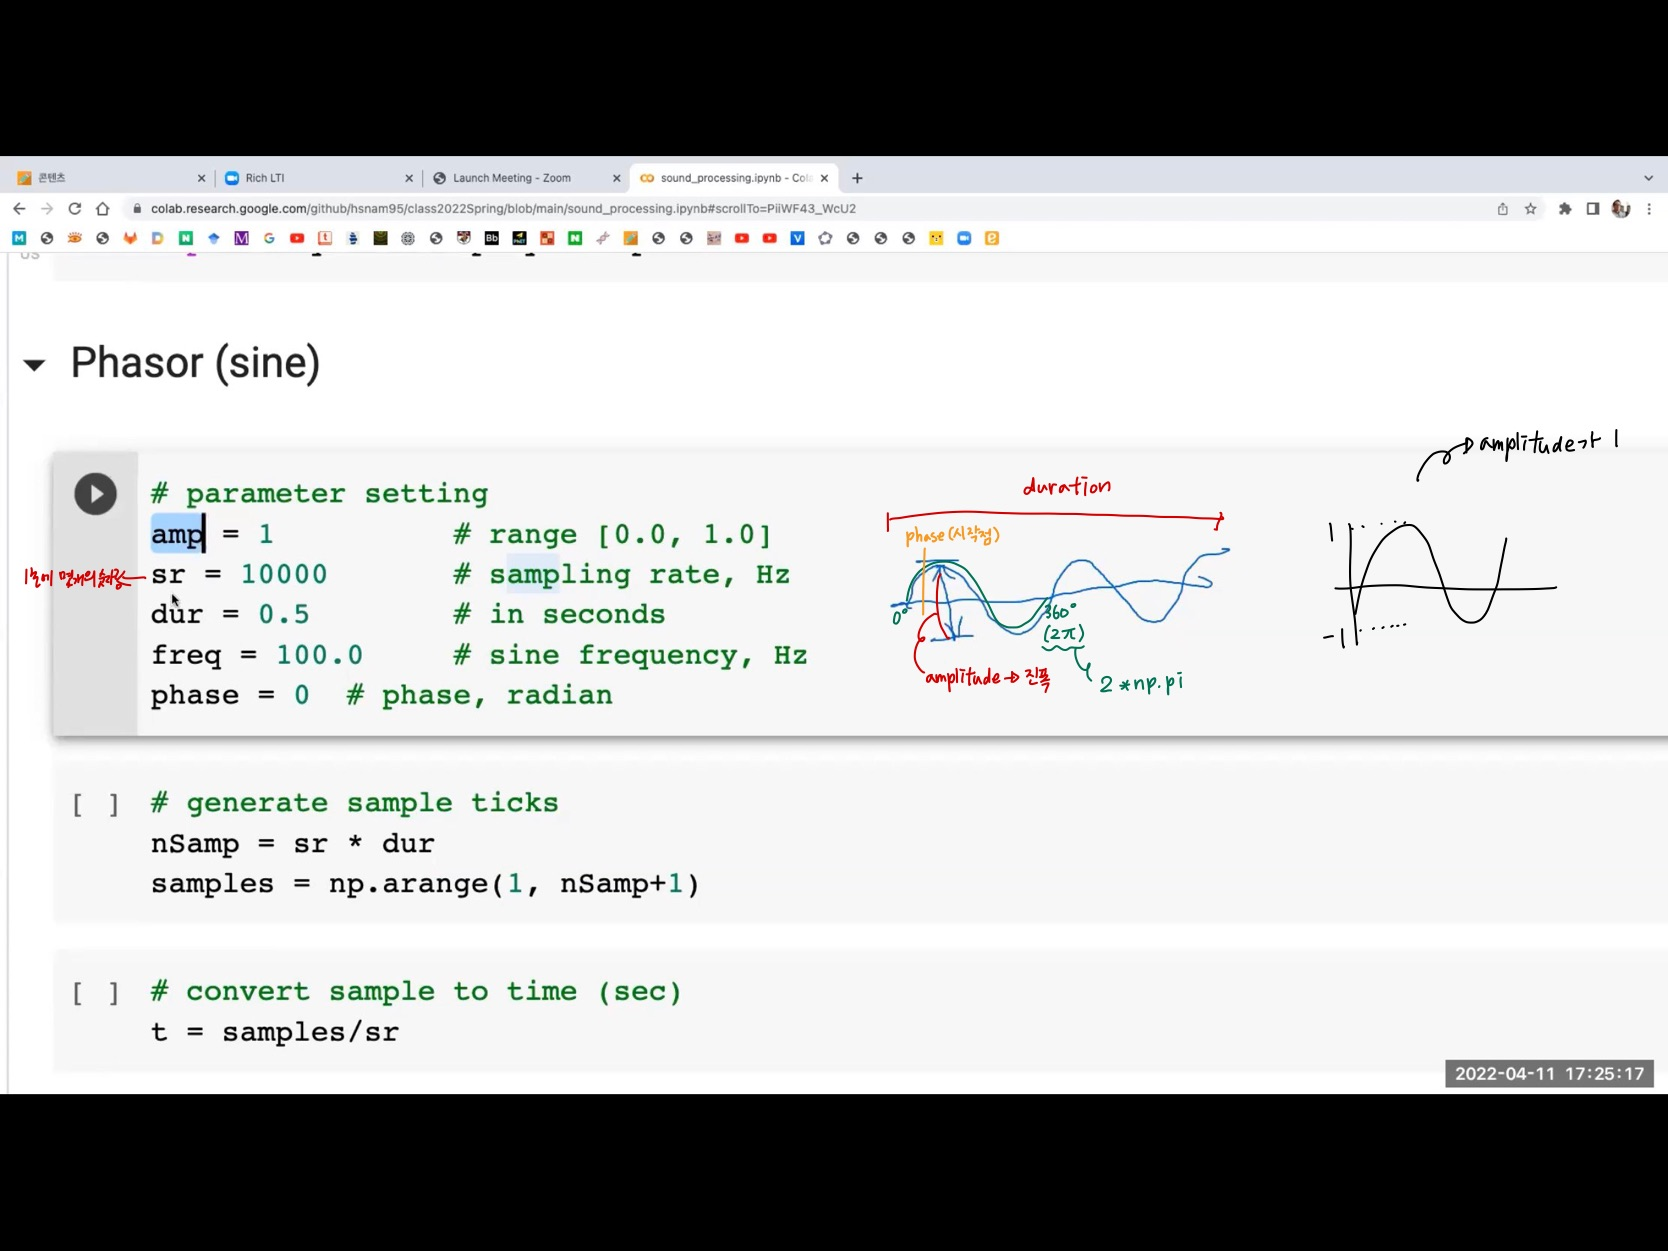

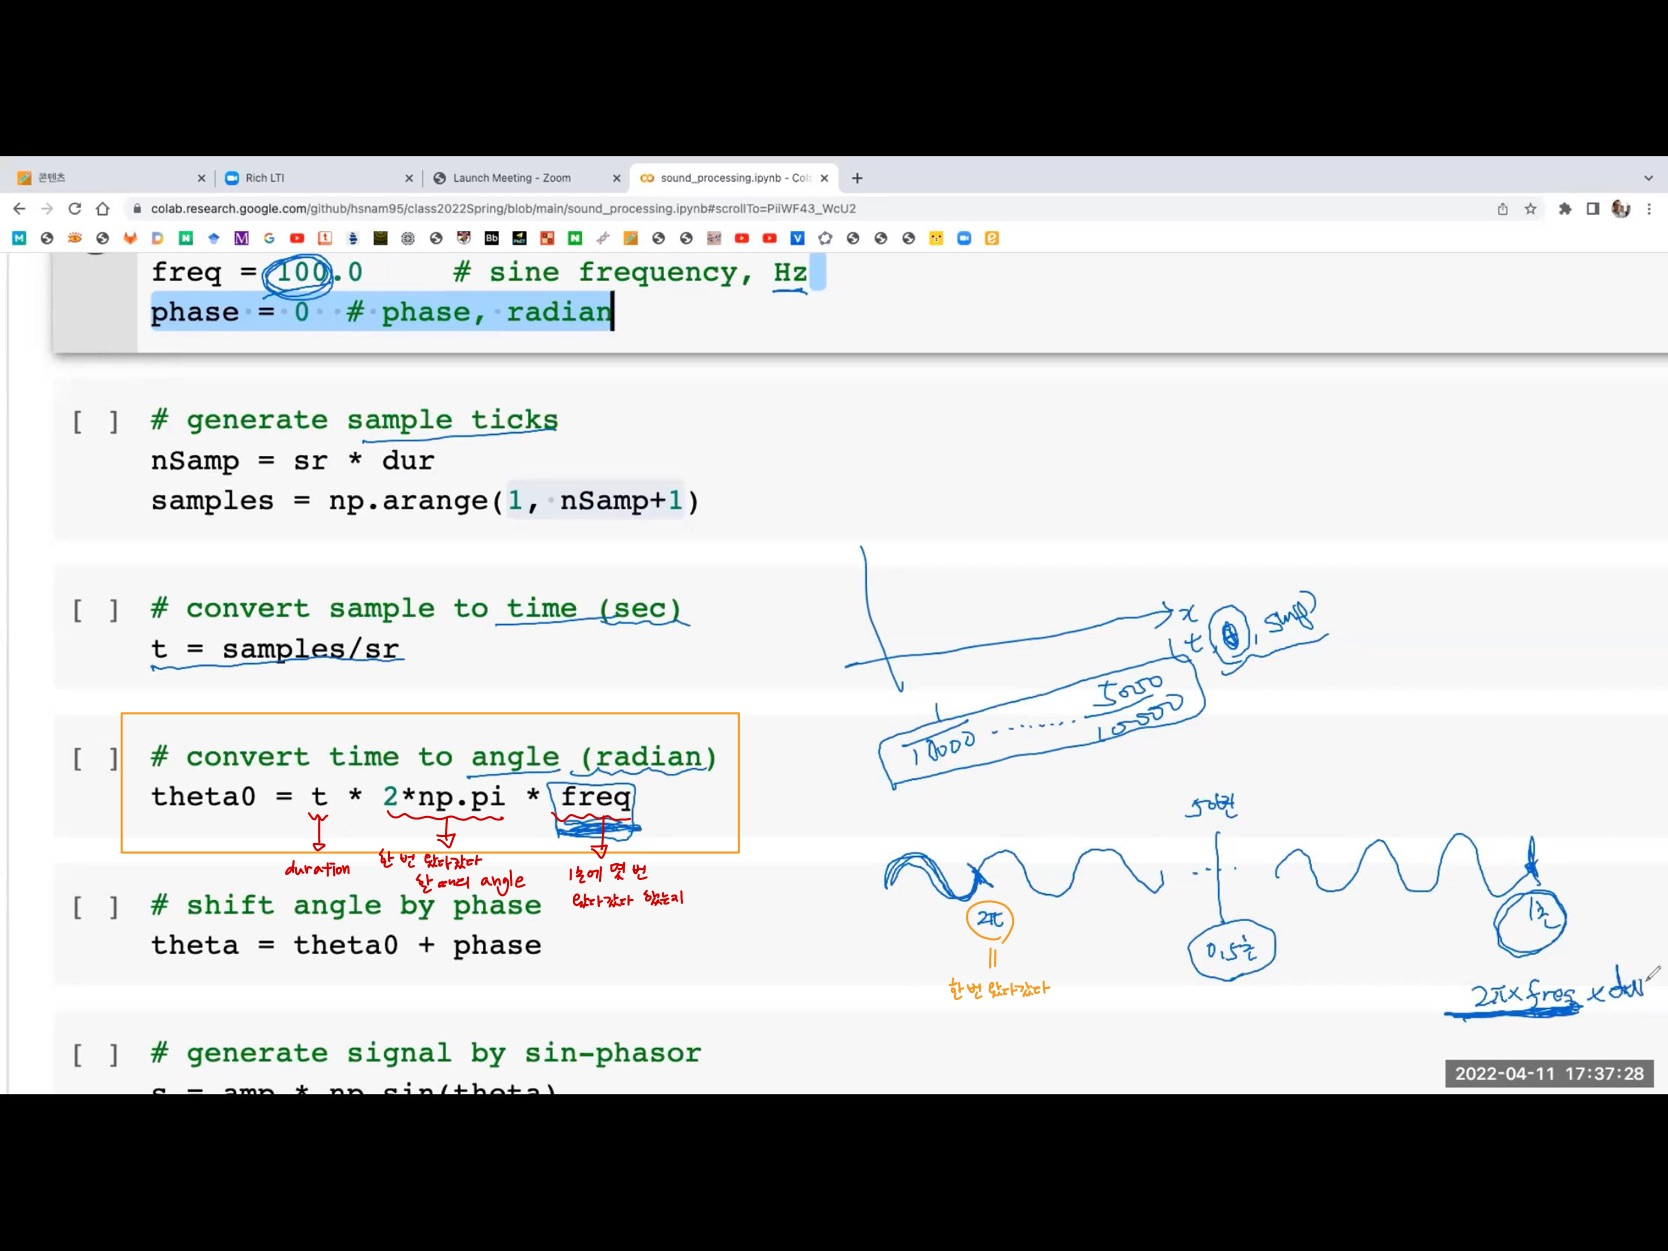

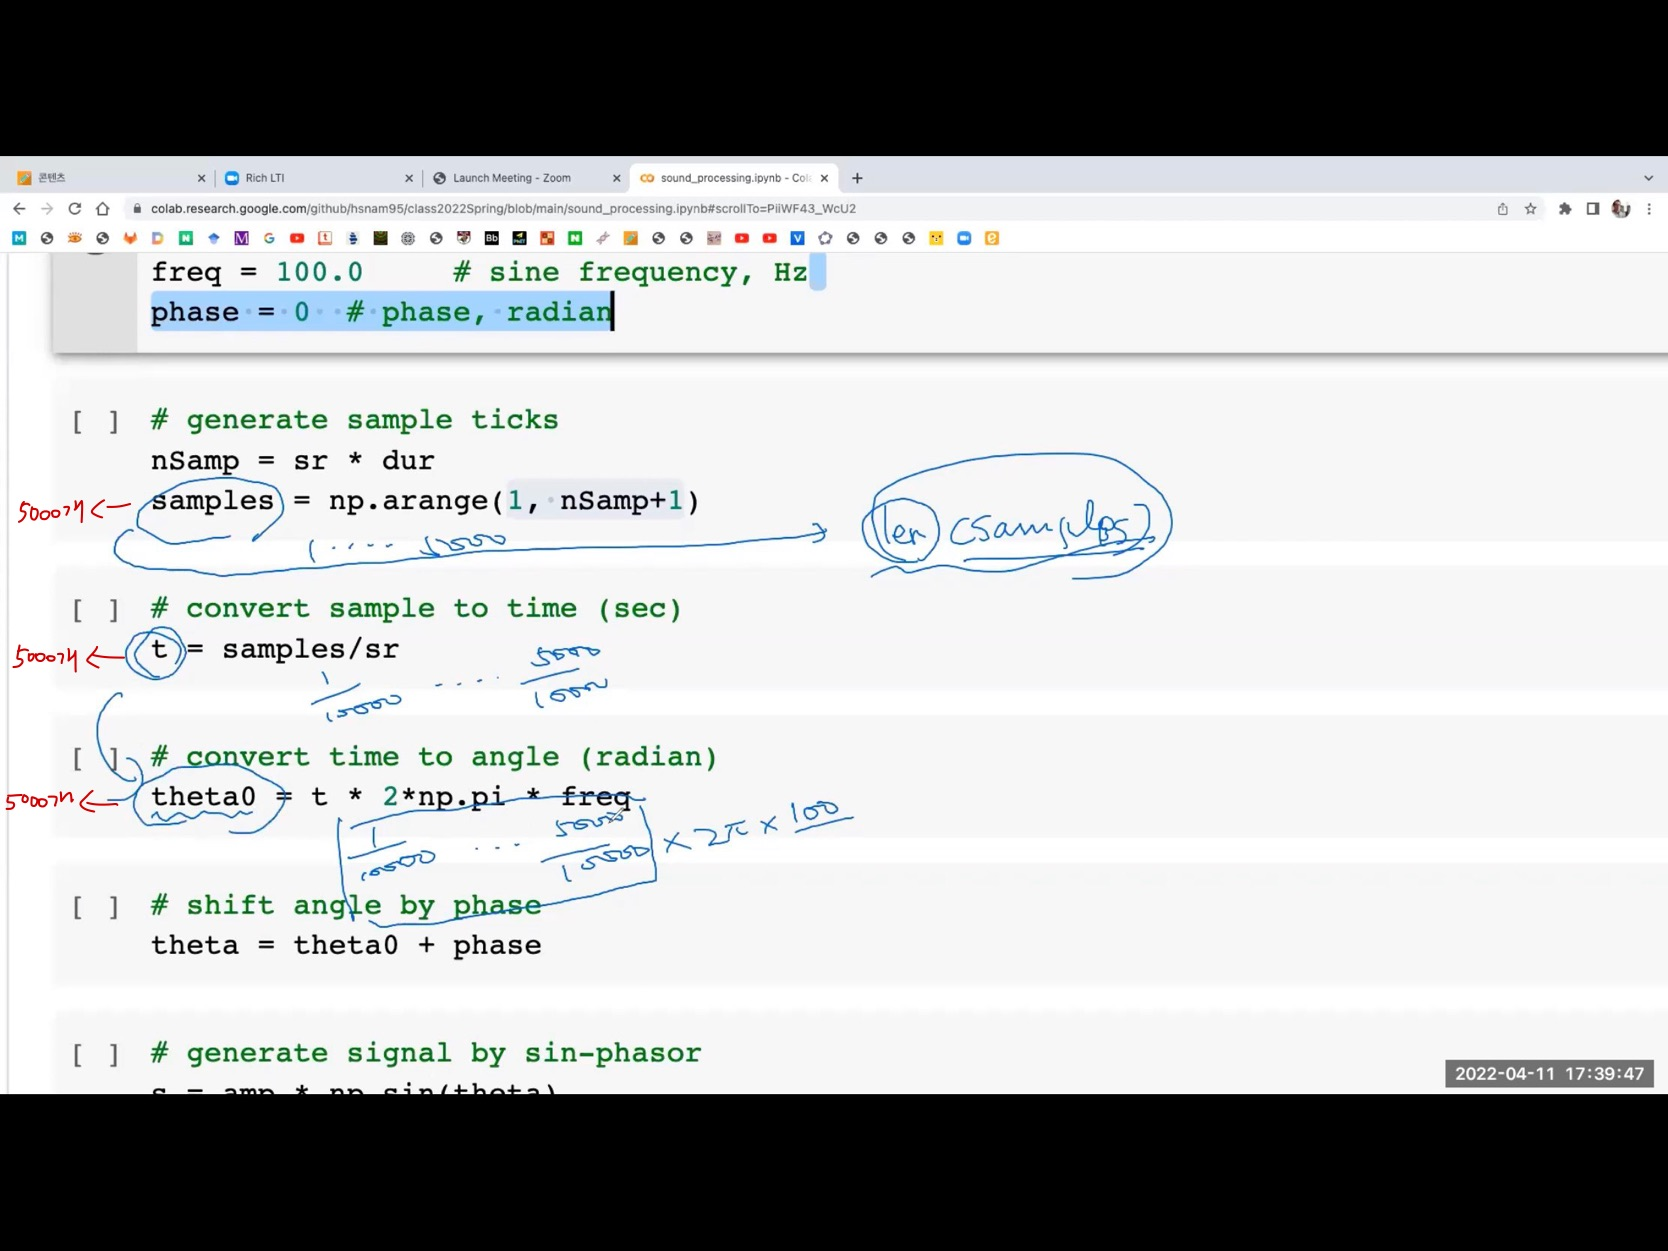

### Phasor (complex)


- sine으로 phasor을 만들수도 있지만 complex로 Phasor를 만들 수도 있음

  -> 입체 형태의 그래프가 만들어짐

In [ ]:
# parameter setting


amp = 1          # range [0.0, 1.0]
sr = 10000       # sampling rate, Hz
dur = 0.5        # in seconds
freq = 100.0     # sine frequency, Hz
phase = 0  # phase, radian

In [ ]:
# generate sample ticks
nSamp = sr * dur
samples = np.arange(1, nSamp+1)

In [ ]:
# convert samples to time
t = samples/sr

In [ ]:
# convert time to angle in radian
theta0 = t * 2*np.pi * freq

In [ ]:
# shift angle by phase
theta = theta0 + phase

In [ ]:
# generate signal by complex-phasor   -> complex-pasor는 sine함수와 cosine함수를 동시에 갖고 있음 - superior함 

c = amp * np.exp(theta*1j)   # np.sin()대신에 np.exp -> 이게 e(2.xxx)라는 숫자! 1j는 허수! (j가 허수임)  -> sin대신에 이렇게 바꿔준 것



In [ ]:
# plot the entire signal

import plotly.graph_objects as go
x, y, z = t, c.real, c.imag
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,
                                   mode='markers',
                                   marker=dict(size=3))])
fig.update_layout(scene = dict(
                    xaxis_title='time (sec)',
                    yaxis_title='real',
                    zaxis_title='imag'))
fig.show()

In [ ]:
# plot a certain portion of signals

import plotly.graph_objects as go
sampleRng = np.arange(0,100)
x, y, z = t[sampleRng], c.real[sampleRng], c.imag[sampleRng]
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,
                                   mode='markers',
                                   marker=dict(size=3))])
fig.update_layout(scene = dict(
                    xaxis_title='time (sec)',
                    yaxis_title='real',
                    zaxis_title='imag'))
fig.show()

In [ ]:
ipd.Audio(c, rate=sr)


# complex phasor에서 audio 실행할 때는 실수부나 허수부 둘 중 하나만 선택해서 할 수 있음 -> plotting할때는 두개 동시에 가능 

In [ ]:
def phasor_complex(amp, sr, dur, freq, phase):
  t = np.arange(1, sr * dur+1)/sr
  theta = t * 2*np.pi * freq + phase
  c = amp * np.exp(theta*1j)
  return c, t, theta

In [ ]:
amp = 1; sr = 10000; dur = 1; freq = 440; phase = 0
c, t, theta = phasor_complex(amp, sr, dur, freq, phase)
ipd.Audio(c.real, rate=sr)      # c.real -> real part만 쓰겠다는 것. c.imag -> imagnery(허수) 파트만 쓰겠다는 것

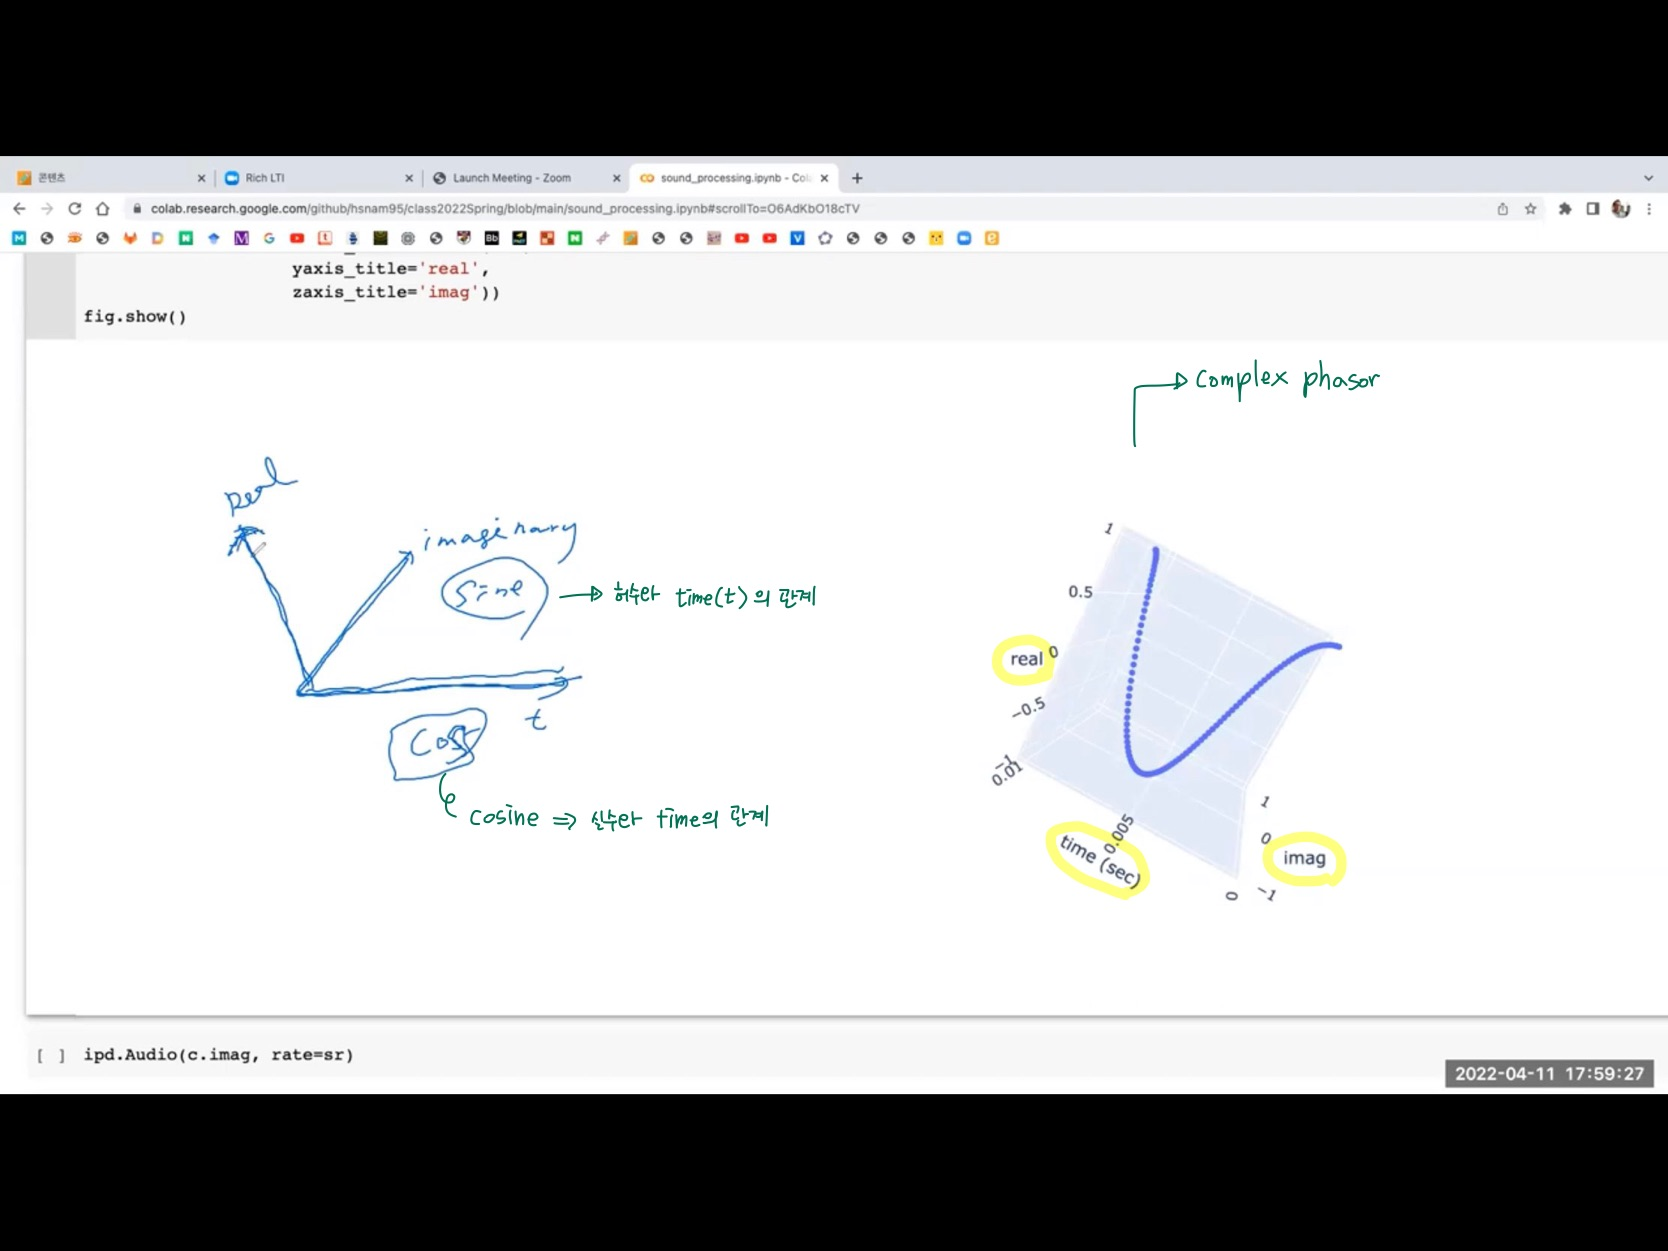

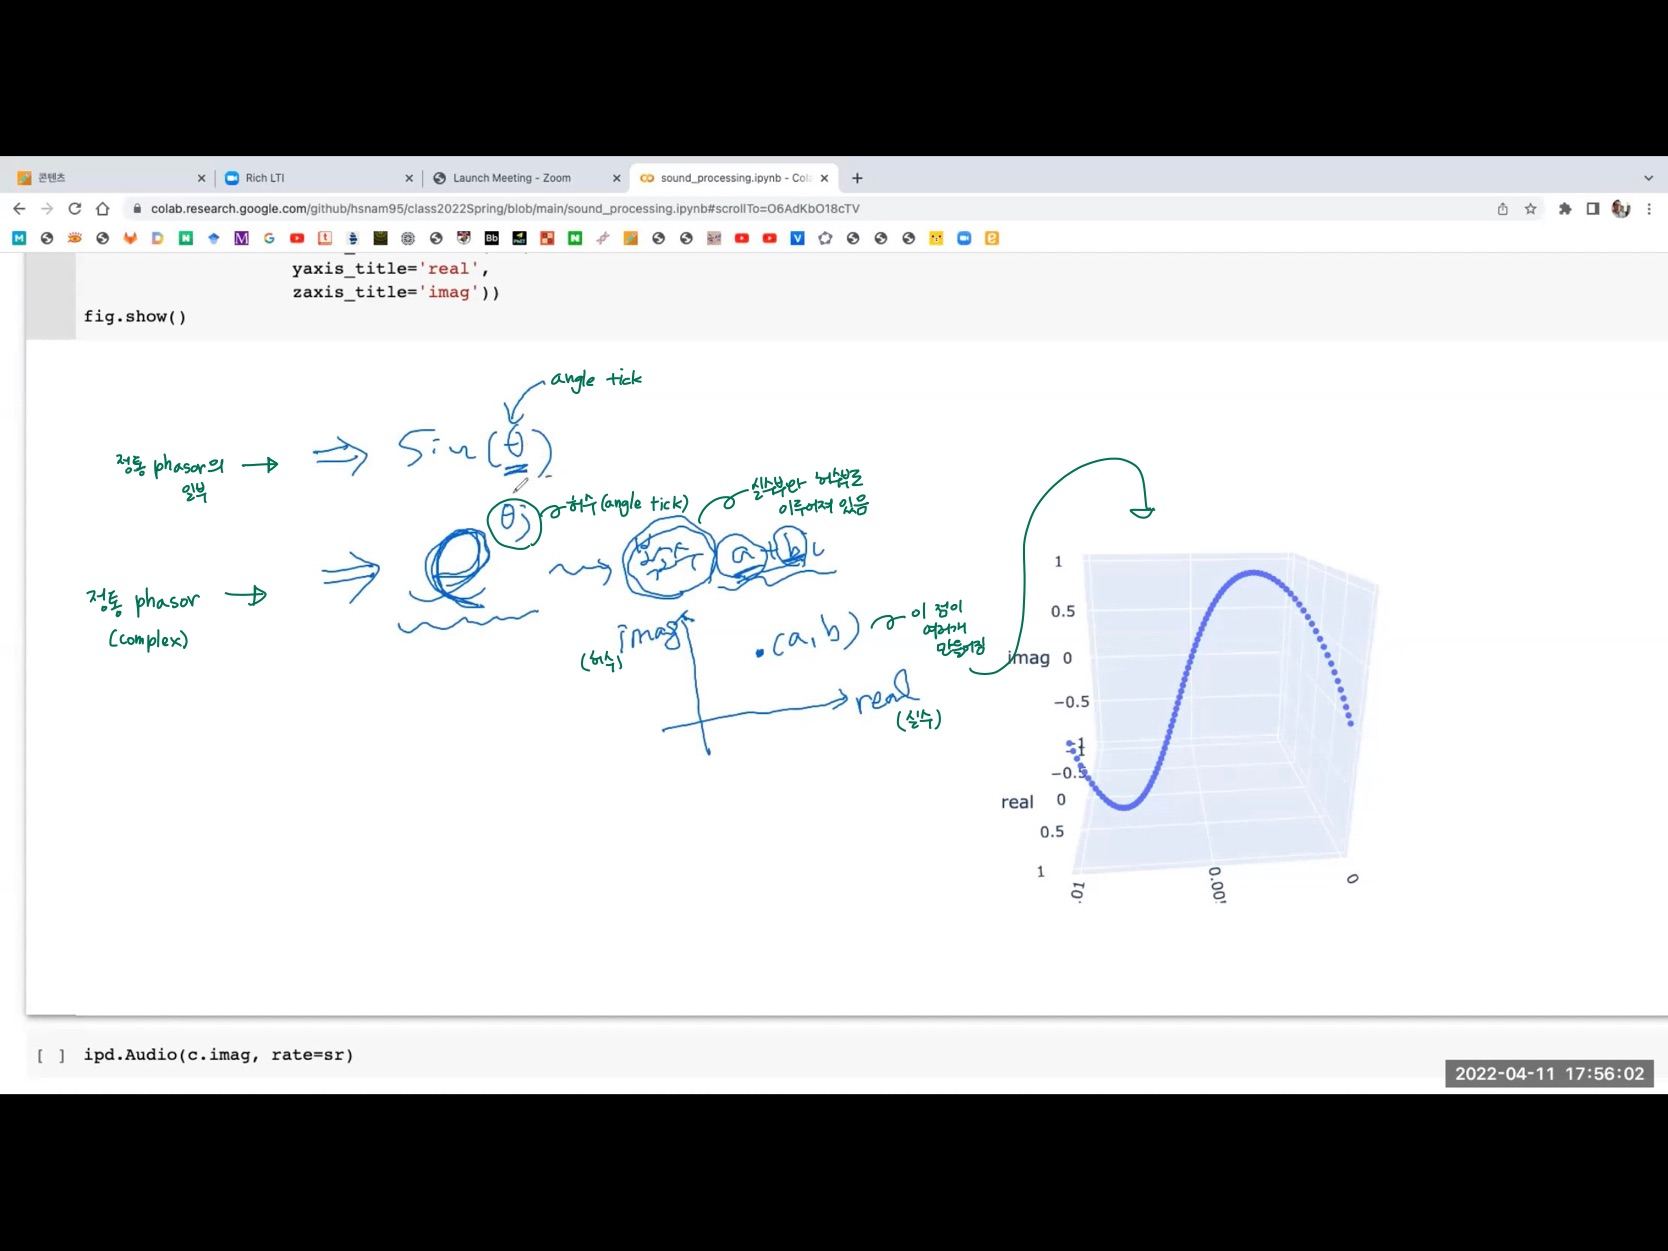